In [1]:
import json
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# Load data
with open('../../data/tweets_vips_party.json', 'r') as f:
    tweets_vips = json.load(f)

In [3]:
# count number of tweets 

In [4]:
# json to df (without the key)
df = pd.DataFrame.from_dict(tweets_vips, orient='index')
df

,author_id,created_at,text,party
1544421129795821570,1047059160,2022-07-05,🔵 Sempre più in alto\n“Il cielo è sempre più b...,Fratelli d'Italia
1544412619821432834,958522192857251841,2022-07-05,"Oggi, con i colleghi Ettore Rosato e Marco Di ...",Partito Democratico
1544410254343081990,130537001,2022-07-05,La cattiveria non conosce limiti. Per vantarsi...,Fratelli d'Italia
1544407020148858881,61160450,2022-07-05,"Buon lavoro al sindaco Bucci, alla maggioranza...",Lega
1544406008746987521,2416067982,2022-07-05,Spesso mi dicono “tu devi essere più gentile” ...,Azione - Italia Viva
...,...,...,...,...
1574511691827658752,214485357,2022-09-26,L'Italia ha deciso premiando FdI e riducendo l...,Partito Democratico
1574511835616669701,214485357,2022-09-26,La destra ha vinto legittimamente le elezioni ...,Partito Democratico
1574512794984030208,214485357,2022-09-26,"Dall’altra parte c’è il Pd, che sconta la manc...",Partito Democratico
1574513706146402304,214485357,2022-09-26,Il M5S in Romagna si attesta sull’8-9% dal 32%...,Partito Democratico


In [5]:
start_before = '2022-07-01'
start_during = '2022-08-26'
start_after = '2022-09-25'
end_after = '2022-10-31'

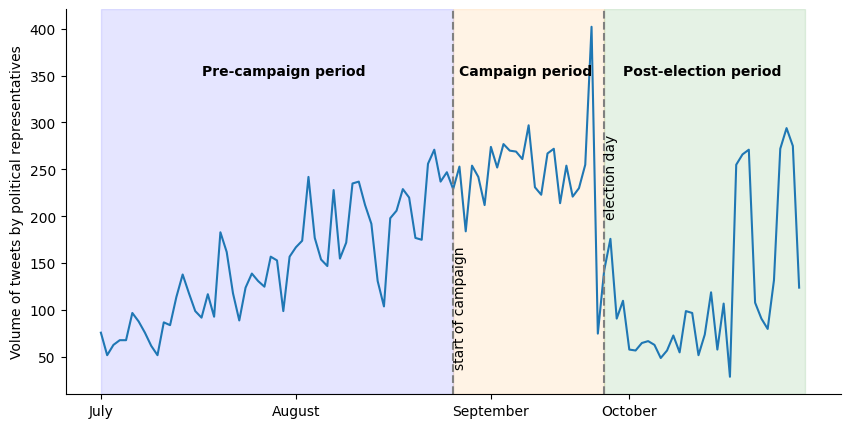

In [6]:
# define figure size
plt.figure(figsize=(10, 5))

# lineplot of number of tweets by day
sns.lineplot(data=df.groupby('created_at').size())
plt.axvline(start_during, color='grey', linestyle='--')
plt.axvline(start_after, color='grey', linestyle='--')

# annotate the plot
plt.text(start_during, 40, 'start of campaign', rotation=90)
plt.text(start_after, 200, 'election day', rotation=90)

plt.ylabel('Volume of tweets by political representatives')
plt.xlabel('')

plt.xticks(ticks=['2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01'],
           labels=['July', 'August', 'September', 'October'])

# add annotation of "Pre-campaign period", "Campaign period", "Post-election period"
plt.axvspan(start_before, start_during, alpha=0.1, color='blue')
plt.axvspan(start_during, start_after, alpha=0.1, color='darkorange')
plt.axvspan(start_after, end_after, alpha=0.1, color='green')
 
plt.text('2022-07-17', 350, 'Pre-campaign period', rotation=0, color='black', fontsize=10, fontweight='bold')
plt.text('2022-08-27', 350, 'Campaign period', rotation=0, color='black', fontsize=10, fontweight='bold')
plt.text('2022-09-30', 350, 'Post-election period', rotation=0, color='black', fontsize=10, fontweight='bold')

sns.despine()

plt.show()



In [7]:
def get_period(date):
    if date < start_during:
        return 'Pre-campaign'
    elif date < start_after:
        return 'Campaign'
    else:
        return 'Post-election'

In [8]:
df["period"] = df["created_at"].apply(get_period)
df.head()

,author_id,created_at,text,party,period
1544421129795821570,1047059160,2022-07-05,🔵 Sempre più in alto\n“Il cielo è sempre più b...,Fratelli d'Italia,Pre-campaign
1544412619821432834,958522192857251841,2022-07-05,"Oggi, con i colleghi Ettore Rosato e Marco Di ...",Partito Democratico,Pre-campaign
1544410254343081990,130537001,2022-07-05,La cattiveria non conosce limiti. Per vantarsi...,Fratelli d'Italia,Pre-campaign
1544407020148858881,61160450,2022-07-05,"Buon lavoro al sindaco Bucci, alla maggioranza...",Lega,Pre-campaign
1544406008746987521,2416067982,2022-07-05,Spesso mi dicono “tu devi essere più gentile” ...,Azione - Italia Viva,Pre-campaign


In [9]:
# group by period and party and count number of tweets
df_grouped = df.groupby(['period', 'party']).size().reset_index(name='count')
df_grouped

,period,party,count
0,Campaign,Alleanza Verdi Sinistra,240
1,Campaign,Azione - Italia Viva,1237
2,Campaign,Forza Italia,439
3,Campaign,Fratelli d'Italia,1252
4,Campaign,Lega,1193
5,Campaign,Movimento 5s,373
6,Campaign,Noi moderati,48
7,Campaign,Partito Democratico,1136
8,Post-election,Alleanza Verdi Sinistra,143
9,Post-election,Azione - Italia Viva,855


In [10]:
df_grouped_party = df.groupby(['party']).size().reset_index(name='count')
df_grouped_party

,party,count
0,Alleanza Verdi Sinistra,622
1,Azione - Italia Viva,3570
2,Forza Italia,1207
3,Fratelli d'Italia,4371
4,Lega,3869
5,Movimento 5s,1039
6,Noi moderati,161
7,Partito Democratico,3169


# Count tweets, retweets, quotes

In [3]:
# Load data
with open('../../data/tweets_all.json', 'r') as f:
    tweets_all = json.load(f)

In [10]:
# print first tweet
print(tweets_all["1544471078004826118"])

{'author_id': '1169200110', 'created_at': '2022-07-05T23:59:34.000Z'}


In [11]:
len(tweets_all)

8353745

In [5]:
len(tweets_all) - len(tweets_vips)

8335737

In [12]:
# Load data
with open('../../data/retweets_all.json', 'r') as f:
    retweets_all = json.load(f)

In [13]:
len(retweets_all)

10639195

In [14]:
# Load data
with open('../../data/quote_all.json', 'r') as f:
    quote_all = json.load(f)

In [15]:
len(quote_all)

301034

In [16]:
df_vips_names = pd.read_csv("../../data/twitter_representatives_handles_final.csv")

In [18]:
df_vips_names["Party"].value_counts()

Fratelli d'Italia          181
Partito Democratico        107
Lega                        95
Movimento 5s                80
Forza Italia                62
Azione - Italia Viva        30
Noi moderati                15
Alleanza Verdi Sinistra     12
Name: Party, dtype: int64

In [20]:
# in tweets_all and quote_all, look for tweets whose author_id is not in df_vips_names[ids]
# in retweets_all, look for tweets whose retweeted_id is not in df_vips_names[ids]

# get ids of vips
vips_ids = df_vips_names["ids"].tolist()

# get ids of tweets
tweets_ids = list(tweets_all.keys()) 

count_novips = 0
for tweet_id in tweets_ids:
    if tweets_all[tweet_id]["author_id"] not in vips_ids:
        count_novips += 1

count_novips

8336446

In [22]:
# get ids of vips
vips_ids = df_vips_names["ids"].tolist()

# get ids of tweets
quotas_ids = list(quote_all.keys()) 

count_novips = 0
for quotas_id in quotas_ids:
    if quote_all[quotas_id]["author_id"] not in vips_ids:
        count_novips += 1

count_novips

300325

In [23]:
# get ids of vips
vips_ids = df_vips_names["ids"].tolist()

# get ids of tweets
retweets_ids = list(retweets_all.keys()) 

count_novips = 0
for retweet_id in retweets_ids:
    if retweets_all[retweet_id]["author_id"] not in vips_ids:
        count_novips += 1

count_novips

10623875

In [ ]:
# get ids of vips
vips_ids = df_vips_names["ids"].tolist()

# get ids of tweets
tweets_ids = list(tweets_all.keys())

count_novips = 0
for tweet_id in tweets_ids:
    if tweets_all[tweet_id]["author_id"] not in vips_ids:
        count_novips += 1

count_novips

By party

In [24]:
# get ids of vips
vips_ids = df_vips_names["ids"].tolist()
party_vips = df_vips_names["Party"].tolist()

# get ids of tweets
retweets_ids = list(retweets_all.keys()) 

# count number of retweets by vips (by party)
count_vips = {}
for retweet_id in retweets_ids:
    if retweets_all[retweet_id]["author_id"] in vips_ids:
        party = party_vips[vips_ids.index(retweets_all[retweet_id]["author_id"])]
        if party in count_vips:
            count_vips[party] += 1
        else:
            count_vips[party] = 1

count_vips

{'Azione - Italia Viva': 3176,
 "Fratelli d'Italia": 3350,
 'Noi moderati': 39,
 'Lega': 2575,
 'Movimento 5s': 413,
 'Partito Democratico': 3425,
 'Alleanza Verdi Sinistra': 1979,
 'Forza Italia': 363}